In [35]:
%matplotlib inline

import math

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.cross_validation import train_test_split


import matplotlib.pyplot as plt


In [36]:
data = pd.read_csv('../nikhil/initial_data_urban_area.csv')

In [37]:
# list(data.columns.values)

In [38]:
df = data[data['StationCount']>0]
# df = data
print len(df)
# df["rate"] = df["Total"]/df["count"]
# df = df.drop('UANUM', 1).drop('UANAME', 1).drop('UANAME_LONG', 1).drop('PeoplePerStation', 1).drop('StationsPerPerson', 1).drop('State', 1).drop('Geography', 1).drop('Latitude', 1).drop('Longitude', 1)
df = df.dropna()
# list(df.columns.values)

1010


In [39]:
df['Total; Estimate; Population 18 to 24 years'] =df['Total; Estimate; Population 18 to 24 years']/df['Population']
df['Male; Estimate; Population 18 to 24 years'] =df['Male; Estimate; Population 18 to 24 years']/df['Population']
df['Female; Estimate; Population 18 to 24 years'] =df['Female; Estimate; Population 18 to 24 years']/df['Population']
df['Total; Estimate; Population 25 years and over'] =df['Total; Estimate; Population 25 years and over']/df['Population']
df['Male; Estimate; Population 25 years and over'] =df['Male; Estimate; Population 25 years and over']/df['Population']
df['Female; Estimate; Population 25 years and over'] =df['Female; Estimate; Population 25 years and over']/df['Population']
df['Total; Estimate; Population 25 to 34 years'] =df['Total; Estimate; Population 25 to 34 years']/df['Population']
df['Male; Estimate; Population 25 to 34 years'] =df['Male; Estimate; Population 25 to 34 years']/df['Population']
df['Female; Estimate; Population 25 to 34 years'] =df['Female; Estimate; Population 25 to 34 years']/df['Population']
df['Total; Estimate; Population 35 to 44 years'] =df['Total; Estimate; Population 35 to 44 years']/df['Population']
df['Male; Estimate; Population 35 to 44 years'] =df['Male; Estimate; Population 35 to 44 years']/df['Population']
df['Female; Estimate; Population 35 to 44 years'] =df['Female; Estimate; Population 35 to 44 years']/df['Population']
df['Total; Estimate; Population 45 to 64 years'] =df['Total; Estimate; Population 45 to 64 years']/df['Population']
df['Male; Estimate; Population 45 to 64 years'] =df['Male; Estimate; Population 45 to 64 years']/df['Population']
df['Female; Estimate; Population 45 to 64 years'] =df['Female; Estimate; Population 45 to 64 years']/df['Population']
df['Total; Estimate; Population 65 years and over'] =df['Total; Estimate; Population 65 years and over']/df['Population']
df['Male; Estimate; Population 65 years and over'] =df['Male; Estimate; Population 65 years and over']/df['Population']
df['Female; Estimate; Population 65 years and over'] =df['Female; Estimate; Population 65 years and over']/df['Population']
df['graduate_25+'] =df['graduate_25+']/df['Population']
df = df.drop('Population', 1)

In [40]:
df = df.iloc[np.random.permutation(len(df))]
df.reset_index(drop=True)
# df
# print ""
df.iloc[0]

StationCount                                                                           38.000000
IncentivesCount                                                                         2.000000
percent_own                                                                            63.551390
Household Income Less than $10,000                                                  35272.000000
Household Income $10,000 to $14,999                                                 24331.000000
Household Income $15,000 to $19,999                                                 24913.000000
Household Income $20,000 to $24,999                                                 22770.000000
Household Income $25,000 to $29,999                                                 21265.000000
Household Income $30,000 to $34,999                                                 20735.000000
Household Income $35,000 to $39,999                                                 18516.000000
Household Income $40,000 to $4

In [41]:
ndata = df.values
ndata = np.hsplit(ndata, np.array([1]))
Y = ndata[0]
X = ndata[1]




In [42]:
train_X, dev_X, train_Y, dev_Y = train_test_split(X, Y, test_size=0.25, random_state=42)
print train_X.shape, train_Y.shape
print dev_X.shape, dev_Y.shape
# print train_X
# print train_Y

(753, 58) (753, 1)
(251, 58) (251, 1)


In [43]:
def try_reggressor(regressor) :

#     print train_X.shape, train_Y.shape
#     print dev_X.shape, dev_Y.shape

    regressor.fit(train_X, train_Y)
    dev_predictions = regressor.predict(dev_X)

    plt.plot(dev_Y, dev_predictions, 'r.')
    plt.show()

    _explained_variance_score = explained_variance_score(dev_Y, dev_predictions)
    _mean_absolute_error = mean_absolute_error(dev_Y, dev_predictions)
    _mean_squared_error = mean_squared_error(dev_Y, dev_predictions)
    _r2_score = r2_score(dev_Y, dev_predictions)
    print _explained_variance_score, _mean_absolute_error, _mean_squared_error, _r2_score


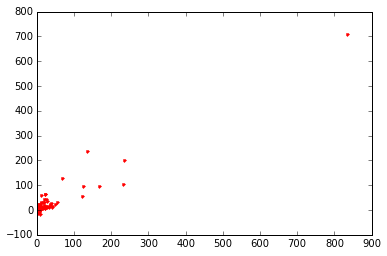

0.910284786527 8.36378769375 312.926999809 0.909778563522


In [44]:
try_reggressor(LinearRegression())

/opt/anaconda/envs/capstone/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


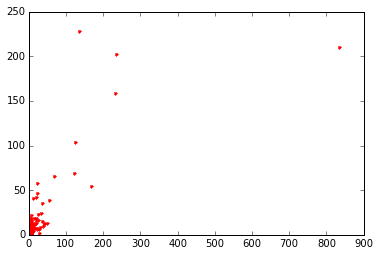

0.505477707129 7.25378486056 1725.76824701 0.502435742619
[  2.51163892e-03   5.25438876e-03   2.49865263e-04   7.38991760e-02
   3.93194674e-04   1.48604662e-03   1.22906184e-03   1.45523308e-03
   1.13837374e-04   9.84393139e-04   4.37171344e-05   8.73095625e-02
   8.09498358e-02   8.87031630e-02   3.79530792e-02   2.08661299e-01
   2.66590636e-01   2.75154779e-02   2.96236853e-03   9.92142680e-04
   5.29783105e-03   9.39426356e-05   8.85714106e-04   2.55490936e-03
   9.70222112e-04   1.80054283e-03   2.69510778e-03   8.66015931e-03
   1.43269658e-03   1.13216762e-02   2.57463957e-03   6.26873478e-03
   1.02027488e-03   1.82892355e-03   3.55538132e-04   1.05841203e-03
   3.94138324e-04   1.18466159e-02   1.89157819e-04   1.48561042e-02
   3.20411823e-04   1.52565150e-02   5.37422821e-05   2.92866046e-04
   1.04079897e-03   2.61625272e-03   6.44496241e-04   3.78926369e-04
   2.71119169e-04   7.28505762e-04   8.01545856e-04   1.05642999e-03
   3.73355512e-03   7.40364395e-04   2.099934

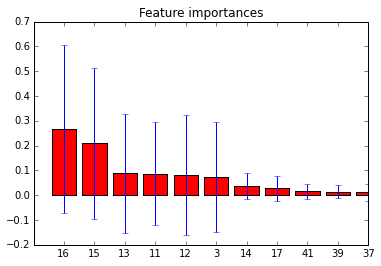

In [45]:
forest = RandomForestRegressor()
try_reggressor(forest)
print forest.feature_importances_

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

cols = train_X.shape[1]
for f in range(cols):
    print("%d. (%f) %s " % (f + 1, importances[indices[f]], df.columns[indices[f]+1]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(cols), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(cols), indices)
plt.xlim([-1, 10])
plt.show()

/opt/anaconda/envs/capstone/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


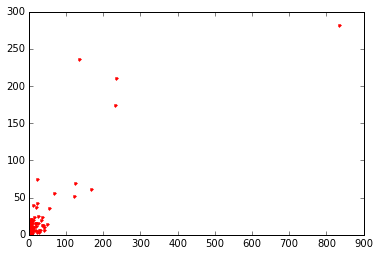

0.596297443218 7.38804780876 1409.16749004 0.593716377085


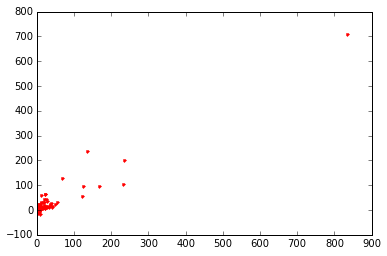

0.910284786527 8.36378769375 312.926999809 0.909778563522


In [46]:
try_reggressor(RandomForestRegressor())
try_reggressor(LinearRegression())